# KMeans vs DBSCAN vs HDBSCAN

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that is particularly well-suited to datasets with noise and clusters of varying shapes and sizes. Unlike k-means, which assumes clusters to be spherical and requires the number of clusters to be specified in advance, DBSCAN determines clusters based on the density of data points.

Here are the main ideas and components of **DBSCAN**:

**Density:** This is the number of points within a specified radius (called eps).

**Core Point:** A data point is a core point if there are at least min_samples points (including the point itself) within the eps distance of it.

**Border Point:** A data point is a border point if it has fewer than min_samples points within the eps distance but is within the eps distance of a core point.

Noise Point: A data point is considered noise if it's neither a core point nor a border point.

DBSCAN algorithm works as follows:

1. Randomly pick a point that has not been visited.
2. Determine if it's a core point. If not, label it as noise. (Note: A border point may be later reclassified if it's found to be within eps distance of a core point.)
3. If the selected point is a core point, form a cluster by recursively finding all directly reachable points from that point (all points within eps distance).
4. Repeat the process until all points have been visited and classified.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import kmeans and DBSCAN
from sklearn.cluster import DBSCAN, KMeans

#### Frist, We will create a non-linearly seperable dataset, and test both K-means and DBSCAN algorithms for clustering these two clusters.

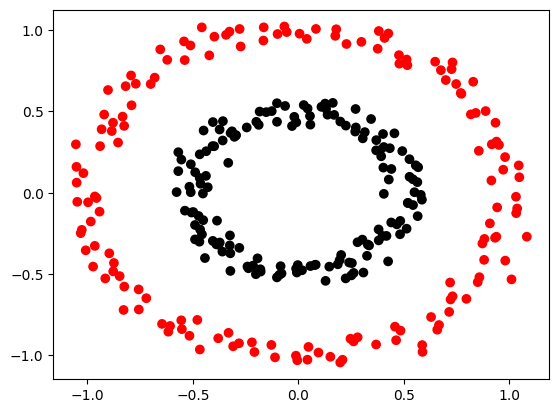

In [2]:
from sklearn.datasets import make_circles

# Generate synthetic data with concentric circles
X, y = make_circles(n_samples=300, factor=.5, noise=.05)

# X contains the X and Y co-ordinates of the data points
# y contains the labels for each data points

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='flag')
plt.show()

## K-means

Let us first try with K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


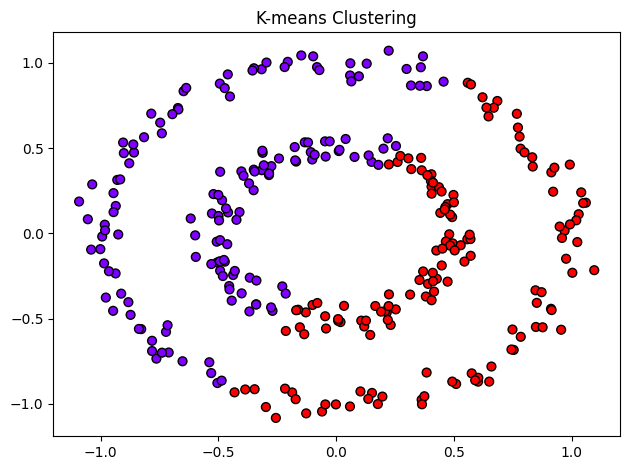

In [32]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X)

# Plot the k-means clustering results
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='rainbow', edgecolor='k', s=40)
plt.title("K-means Clustering")
plt.tight_layout()
plt.show()

As you can obeserve, k-means struggles to correctly cluster the data points in the concentric circles due to its assumption of spherical clusters.

## DBSCAN

DBSCAN has an advantage over k-means in scenarios where:

1. Clusters are of varying shapes (not just spherical).
2. Noise is present in the data.
3. The number of clusters isn't known beforehand.

k-means struggles with this because it assumes clusters to be spherical and requires the number of clusters to be specified in advance. DBSCAN, on the other hand, can identify clusters of arbitrary shape and is also robust to noise.

**DBSCAN** requires the value of epsilon and the min_samples.

Finding the optimal value for the ε (epsilon) parameter in DBSCAN can be somewhat tricky since there's no definitive method that works best for all datasets. However, one commonly used technique is the k-distance graph (also known as the "elbow method")

Here is how we can generate the elbow plot:

**Compute the Nearest Neighbors:**
For each point, compute the distance to its k-th nearest neighbor, where k is typically set to the min_samples you intend to use in DBSCAN.

**Sort and Plot:**
Sort these distances in ascending order and then plot them. The idea is to find an "elbow" in the graph, which is a point where the rate of increase sharply changes. This "elbow" point is a good estimate for ε.

**Interpretation:**
The region before the elbow represents points that are part of dense regions (and hence the distance to their k-th nearest neighbor is low). The region after the elbow represents points that are farther away from any dense region.


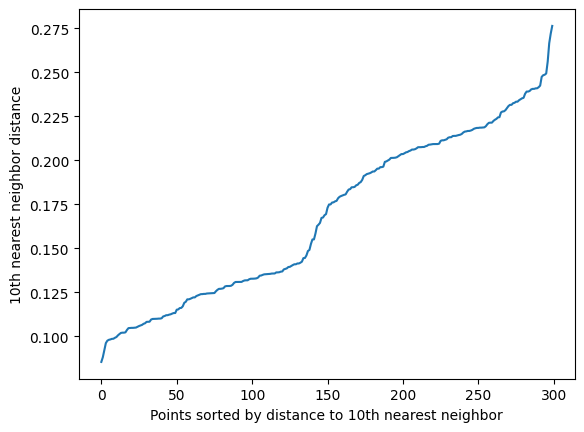

In [4]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=10)  # Assuming min_samples=5 for DBSCAN
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)

# Sort distances and plot
sorted_distances = np.sort(distances[:, -1])
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to 10th nearest neighbor')
plt.ylabel('10th nearest neighbor distance')
plt.show()


In [29]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.13, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

**The quality of clustering depends heavily on the choice of eps and min_samples.**

* The value of min_samples can be chosen based on the dimensionality of your dataset. A rule of thumb is
min_samples ≥ D + 1 , where D is the dimensionality of the data. For higher-dimensional data, you may need to increase min_samples to help reduce the curse of dimensionality.

* If your dataset has clusters of varying densities, you might need to experiment with different values of min_samples. A smaller min_samples might detect smaller and less dense clusters, while a larger value might only recognize larger, more dense clusters.

* It's often helpful to iterate over a range of min_samples values and evaluate the clustering results. This could be done visually (if the dataset is low-dimensional) or by using internal clustering metrics (if no ground truth is available) like the Silhouette score, Davies-Bouldin index, etc.

* Often, domain knowledge can guide the choice. For instance, if you're clustering data where you know a cluster should have at least a certain number of points to be meaningful, you can use that number (or slightly higher) as min_samples.

* Remember that the effectiveness of min_samples is closely tied to the
ε value. When you're tuning min_samples, you might need to revisit and adjust the ε accordingly.

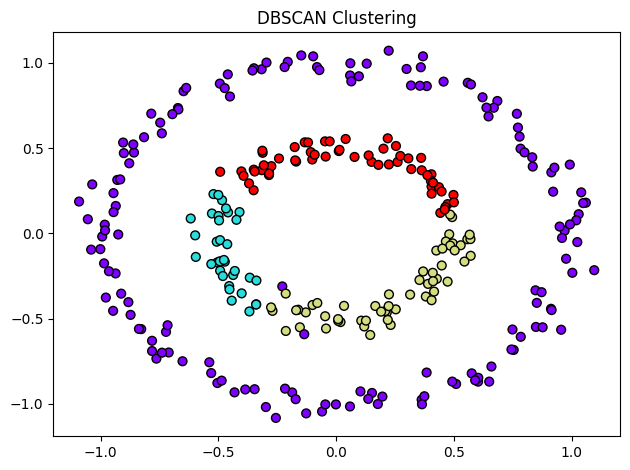

In [30]:
# Plot the DBSCAN clustering results
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='rainbow', edgecolor='k', s=40)
plt.title("DBSCAN Clustering")
plt.tight_layout()
plt.show()

## Summary

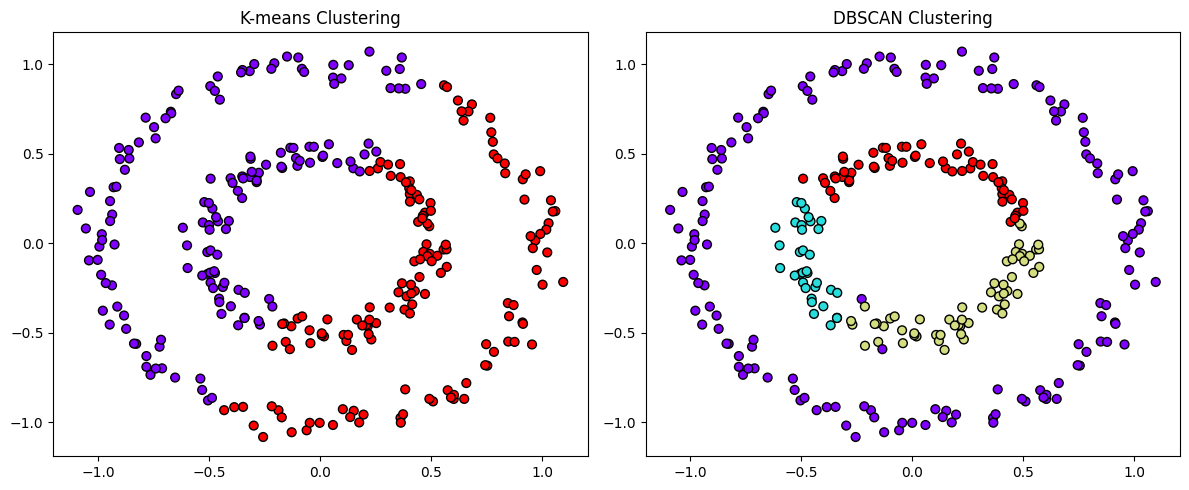

In [33]:
# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# K-means clustering
ax[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='rainbow', edgecolor='k', s=40)
ax[0].set_title("K-means Clustering")

# DBSCAN clustering
ax[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='rainbow', edgecolor='k', s=40)
ax[1].set_title("DBSCAN Clustering")

plt.tight_layout()
plt.show()


In the visual results, you'll notice that k-means struggles to correctly cluster the points in the concentric circles. It will likely split one circle into two clusters. DBSCAN, on the other hand, should correctly identify the two separate circles. This example highlights the strength of DBSCAN in handling non-spherical clusters and its advantage over k-means in such scenarios. You can tune the `min_samples` and `eps` to get two clusters, but we will do that with HDBSCAN below.


DBSCAN has some limitations. DBSCAN can struggle with datasets where clusters have varying densities. This is because a single value of ε and min_samples is used for the entire dataset, which may not be suitable for clusters of different densities.

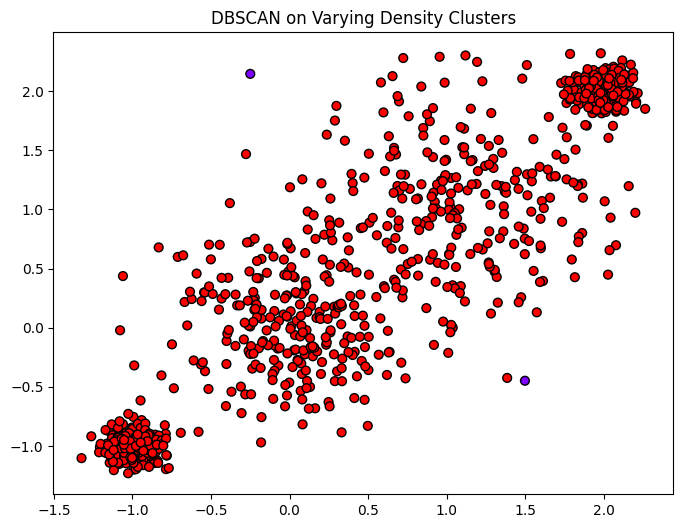

In [17]:
from sklearn.datasets import make_blobs


# Create synthetic data with clusters of varying densities
X, _ = make_blobs(n_samples=1000, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]], cluster_std=[0.1, 0.4, 0.5, 0.1], random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='rainbow', edgecolor='k', s=40)
plt.title('DBSCAN on Varying Density Clusters')
plt.show()


DBSCAN fails to separate clusters that are close to each other and have different densities. One dense cluster might "absorb" a nearby less dense cluster. Adjusting the parameters might help separate some clusters, but then other clusters might get merged or split inappropriately

## HDBSCAN

**HDBSCAN** (Hierarchical Density-Based Spatial Clustering of Applications with Noise) is an extension of the DBSCAN clustering algorithm. HDBSCAN works by converting the space into a density space, where dense regions in the original space become peaks in the density space. By constructing a hierarchy of clusters and then extracting a flat clustering from this hierarchy, HDBSCAN can handle clusters of varying densities much better than DBSCAN.

In [ ]:
!pip install HDBSCAN

In [23]:
import hdbscan

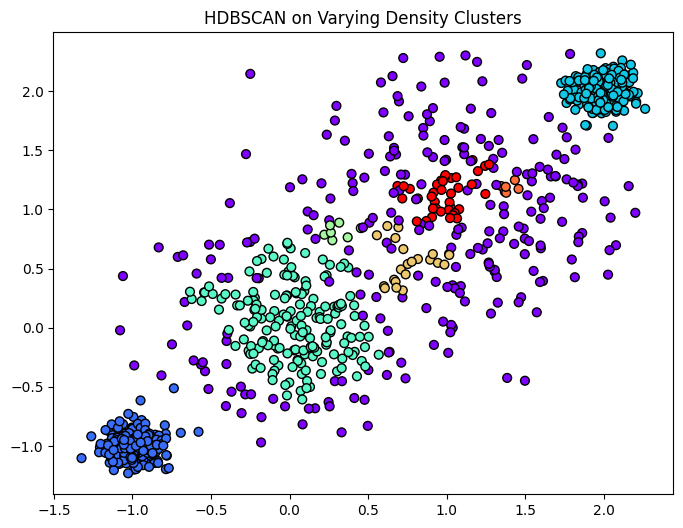

In [25]:
# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, gen_min_span_tree=True)
hdbscan_labels = clusterer.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=hdbscan_labels, cmap='rainbow', edgecolor='k', s=40)
plt.title('HDBSCAN on Varying Density Clusters')
plt.show()

HDBSCAN is able to more accurately identify and separate clusters of varying densities in the dataset.

We can try HDBSCAN on our original concentric circles dataset.

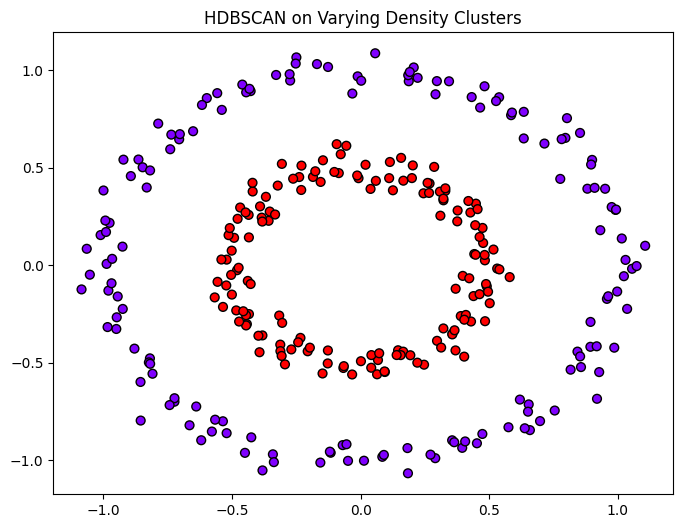

In [34]:
# Generate synthetic data with concentric circles
X, y = make_circles(n_samples=300, factor=.5, noise=.05)

# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, gen_min_span_tree=True)
hdbscan_labels = clusterer.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=hdbscan_labels, cmap='rainbow', edgecolor='k', s=40)
plt.title('HDBSCAN on Varying Density Clusters')
plt.show()